In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [3]:
# Load the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [5]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
data.shape

(5110, 12)

In [10]:
data.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [14]:
from sklearn.impute import KNNImputer
# handling missing values
imputer = KNNImputer(n_neighbors=5, weights='uniform')
data['bmi'] = imputer.fit_transform(data[['bmi']])



In [16]:
data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [18]:
data.duplicated().sum()

0

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [20]:
stroke_count = data['stroke'].value_counts()

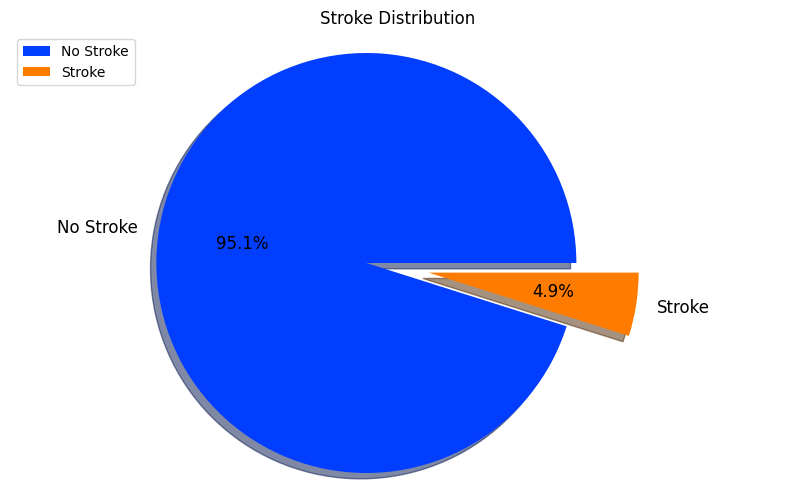

In [21]:
plt.figure(figsize=(10, 6))
plt.pie(stroke_count, labels=['No Stroke', 'Stroke'], autopct='%1.1f%%',
        colors=sns.color_palette('bright', 2), explode=(0.2, 0.1), shadow=True,
        textprops={'fontsize': 12})
plt.title('Stroke Distribution')
plt.legend(loc='upper left')
plt.axis('equal')
plt.show()



    0 means the person will not likely to get stroke
    1 means the person will likely to get stroke

and from the numbers and plot we can conclude this dataset has imbalance on the person who will not likely to get stroke and the person will likely to get stroke



In [22]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [23]:
data = data.drop('id', axis=1)

In [24]:
data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [25]:
categorical = data.select_dtypes(include=['object']).columns.tolist()
categorical

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [26]:
data['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [27]:
data.drop(data[data.gender == 'Other'].index,inplace=True)
data.reset_index(drop=True,inplace=True)

In [30]:
data.gender = data.gender.map({'Male':0,'Female':1})

In [32]:
data['ever_married'].value_counts()

ever_married
Yes    3353
No     1756
Name: count, dtype: int64

In [33]:
data.ever_married = data.ever_married.map({'No':0,'Yes':1})

In [34]:
data.work_type = data.work_type.map({'Private':0,'Self-employed':1,'children':2,'Govt_job':3,'Never_worked':4})

In [35]:
data.Residence_type = data.Residence_type.map({'Urban':0,'Rural':1})

In [36]:
data.smoking_status = data.smoking_status.map({'never smoked':0,'formerly smoked':1,'smokes':2,'Unknown':3})

In [38]:
numeric_features = ['age', 'avg_glucose_level', 'bmi']
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1.051242,0,1,1,0,0,2.706450,1.001041,1,1
1,1,0.785889,0,0,1,1,1,2.121652,-0.000165,0,1
2,0,1.626174,0,1,1,0,1,-0.004867,0.468399,0,1
3,1,0.255182,0,0,1,0,0,1.437473,0.715233,2,1
4,1,1.581949,1,0,1,1,1,1.501297,-0.635858,0,1


<Axes: >

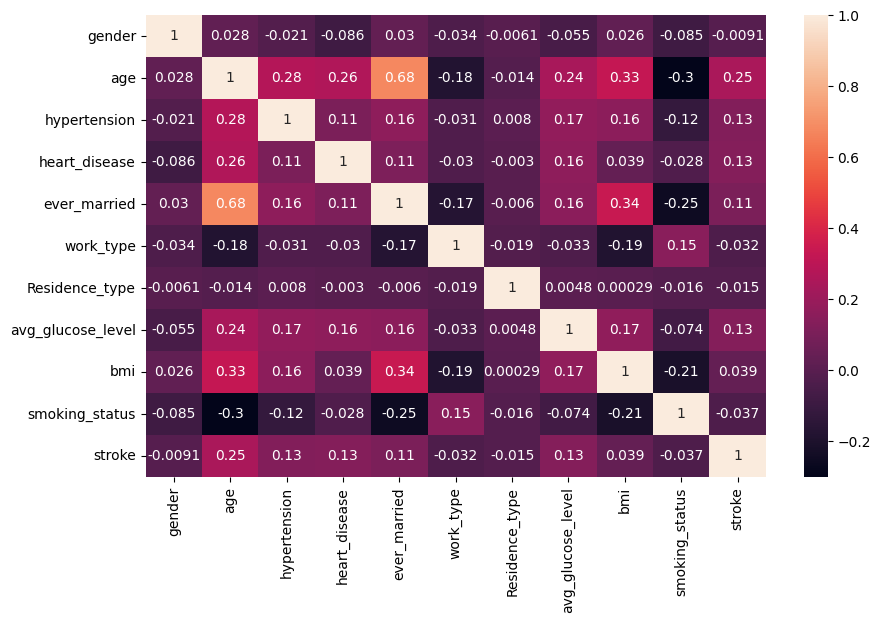

In [39]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [40]:
X = data.drop('stroke', axis=1)
y = data['stroke']
X.shape, y.shape

((5109, 10), (5109,))

In [41]:
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)
print(X_resampled.shape,y_resampled.shape)

(9720, 10) (9720,)


In [56]:
X_train,X_test,y_train,y_test = train_test_split(X_resampled,y_resampled,test_size=0.2,random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)



In [57]:
print("Accuracy score using Random Forest:", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred_rf))

Accuracy score using Random Forest: 0.940843621399177
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       976
           1       0.92      0.97      0.94       968

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



In [51]:
# Create a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
classification_rep_knn = classification_report(y_test, y_pred_knn)

print("Accuracy score using KNN:", accuracy_knn)
print("Classification Report:\n", classification_rep_knn)


Accuracy score using KNN: 0.8940329218106996
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       976
           1       0.84      0.98      0.90       968

    accuracy                           0.89      1944
   macro avg       0.91      0.89      0.89      1944
weighted avg       0.91      0.89      0.89      1944



In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create a Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gbc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gbc = gbc.predict(X_test)

# Evaluate the model
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
classification_rep_gbc = classification_report(y_test, y_pred_gbc)

print("Accuracy score using Gradient Boosting:", accuracy_gbc)
print("Classification Report:\n", classification_rep_gbc)


Accuracy score using Gradient Boosting: 0.8554526748971193
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       976
           1       0.82      0.91      0.86       968

    accuracy                           0.86      1944
   macro avg       0.86      0.86      0.86      1944
weighted avg       0.86      0.86      0.86      1944



In [63]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

# Assume y_pred_knn and y_pred_rf are available from previous model runs
# Combined model by averaging predictions from KNN and RF
combined_predictions = np.round((y_pred_knn + y_pred_rf) / 2).astype(int)

# Calculate the accuracy score
accuracy_combined = accuracy_score(y_test, combined_predictions)

# Print the accuracy score
print("Accuracy score using Combined Model (KNN + RF):", accuracy_combined)

# Optionally, print the classification report
classification_rep_combined = classification_report(y_test, combined_predictions)
print("Classification Report for Combined Model (KNN + RF):\n", classification_rep_combined)

Accuracy score using Combined Model (KNN + RF): 0.9429012345679012
Classification Report for Combined Model (KNN + RF):
               precision    recall  f1-score   support

           0       0.96      0.93      0.94       976
           1       0.93      0.96      0.94       968

    accuracy                           0.94      1944
   macro avg       0.94      0.94      0.94      1944
weighted avg       0.94      0.94      0.94      1944



In [64]:
cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_gb = confusion_matrix(y_test, y_pred_gbc)
cm_combined = confusion_matrix(y_test, combined_predictions)

In [65]:
print("Confusion Matrix for KNN:")
print(cm_knn)

print("Confusion Matrix for Random Forest:")
print(cm_rf)

print("Confusion Matrix for Gradient Boosting:")
print(cm_gb)

print("Confusion Matrix for Combined Model (KNN + RF):")
print(cm_combined)

Confusion Matrix for KNN:
[[792 184]
 [ 22 946]]
Confusion Matrix for Random Forest:
[[890  86]
 [ 29 939]]
Confusion Matrix for Gradient Boosting:
[[786 190]
 [ 91 877]]
Confusion Matrix for Combined Model (KNN + RF):
[[903  73]
 [ 38 930]]
